In [1]:
import tensorflow as tf
import tensorflow.keras as k
import matplotlib.pyplot as plt
import numpy as np
# Add the directory above the current notebook's directory to the system path
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))
from datasets import load_two_spirals_dataset

### PLot functions

In [2]:
def plot_scatter(X:np.ndarray, Y:np.ndarray):
    '''
    Show the scatter plot of flower dataset
    
    Parameters
    ----------
    X : numpy.ndarray [shape: (#features, #samples)]
        matrix of data; dtype: float64
    Y : numpy.ndarray [shape: (1, #samples)]
        array containing true labels 0 or 1; dtype: uint8 
    '''
    scatter=plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    # plt.show()
    

def plot_decision_boundary(predict, X, Y):
    """
    Plot the decision boundary for logistic regression
    
    Parameters
    ----------
    predict : function
        predicted output; dtype=int8 
    parameters : dict
    X : numpy.ndarray [shape: (#features, #samples)]
        matrix of data; dtype: float64
    Y : numpy.ndarray [shape: (1, #samples)]
        array containing true labels 0 or 1; dtype: uint8
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    # Y = None argument is dumpy as not used when print_accuracy=False
    a=tf.constant(np.c_[xx.ravel(), yy.ravel()],dtype=tf.float32)
    Z = predict(a)
    Z=tf.cast(Z > 0.5, "float32")
    Z = Z.numpy().reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plot_scatter(X,Y)

### Import data

(1000, 2) (1000, 1)


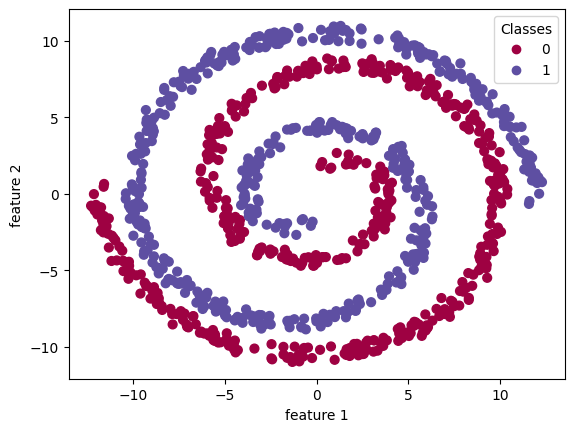

In [3]:
X_np,Y_np = load_two_spirals_dataset(n_points=500, noise=1.0, rev=2.0)
Y_np=Y_np.reshape(1,-1)
X=tf.constant(X_np.T, dtype=tf.float32)
Y=tf.constant(Y_np.reshape(-1,1), dtype=tf.float32)
print(X.shape, Y.shape)
plot_scatter(X_np,Y_np)

### L Layer Neural Network Model

In [4]:
def L_layer_model(train_X, train_Y, layers_dims, learning_rate=0.0075, num_epochs=2000, activation_L_1="relu", activation_L="sigmoid", print_cost=False):
    """
    L layer neural network with different activation function on output layer option.
    
    Parameters
    ----------
    train_X : Tensor [shape: (#samples, #features)]; dtype=tf.float32
    train_Y : Tensor [shape: (#samples, 1)]; dtype=tf.float32
    layers_dims : list of int; list of number of nodes in each layer

    Returns
    -------
    forward : trained model
    costs : list of cost every 100 iteration
    """
    costs = []                                        # To keep track of the cost
    L = len(layers_dims) # number of layers in the network

    ## Initialize model
    forward = k.models.Sequential()
    np.random.seed(3)
    # layers initialized; [1:L-1] X activation_L_1 + [L] X activation_L
    for l in range(1, L-1):
        init_W = (np.random.randn(layers_dims[l], layers_dims[l-1]) / np.sqrt(layers_dims[l-1])).T.astype(np.float32)
        forward.add( k.layers.Dense(units=layers_dims[l], activation=activation_L_1, input_shape=(layers_dims[l-1],),
                                    kernel_initializer=tf.constant_initializer(init_W),
                                    bias_initializer="zeros") )
        #  kernel_initializer=k.initializers.RandomNormal(mean=0.0, stddev=1.0,seed=3)
    init_W = (np.random.randn(layers_dims[-1], layers_dims[-2]) / np.sqrt(layers_dims[-2])).T.astype(np.float32)
    forward.add( k.layers.Dense(units=layers_dims[-1], activation=activation_L, input_shape=(layers_dims[-2],),
                                kernel_initializer=tf.constant_initializer(init_W),
                                bias_initializer="zeros") )
    # forward.summary()

    ## Initialize build-in classes
    bce = tf.keras.losses.BinaryCrossentropy( from_logits=False, reduction='sum')
    optimizer = tf.keras.optimizers.Adam(learning_rate)

    ## epochs loop
    for i in range(num_epochs): 
        ## forward pass
        with tf.GradientTape() as tape:
            train_Y_pred = forward(train_X)       # (209,n_L)=(m,n_L)
            cost = bce(tf.transpose(train_Y), tf.transpose(train_Y_pred))

        ## backward pass
        grads = tape.gradient(cost, forward.trainable_weights)
        optimizer.apply_gradients(zip(grads, forward.trainable_weights))

        ## Record the cost every 100 iterations
        if i % 100 == 0 or i == num_epochs-1:
            costs.append(cost.numpy().item())
            if print_cost:
                print(f"Cost in epochs {i+1}, {cost.numpy().item()}")
    
    return forward, costs


def plot_costs(costs, learning_rate):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

### Detailed info, plots demo

Cost in epochs 1, 0.9791262745857239
Cost in epochs 101, 0.6407090425491333
Cost in epochs 201, 0.5628342032432556
Cost in epochs 301, 0.09234236925840378
Cost in epochs 401, 0.015167372301220894
Cost in epochs 501, 0.0060561648570001125
Cost in epochs 601, 0.0032023645471781492
Cost in epochs 701, 0.002073106821626425
Cost in epochs 801, 0.0014750342816114426
Cost in epochs 901, 0.0011112656211480498
Cost in epochs 1001, 0.0008701964979991317
Cost in epochs 1101, 0.0007007246022112668
Cost in epochs 1201, 0.0005756540922448039
Cost in epochs 1301, 0.00048151062219403684
Cost in epochs 1401, 0.0004039747582282871
Cost in epochs 1501, 0.00034186302218586206
Cost in epochs 1601, 0.00029376696329563856
Cost in epochs 1701, 0.0002538736443966627
Cost in epochs 1801, 0.0002210554521298036
Cost in epochs 1901, 0.0001929774007294327
Cost in epochs 2000, 0.00017091119661927223
train accuracy: 100.0 %


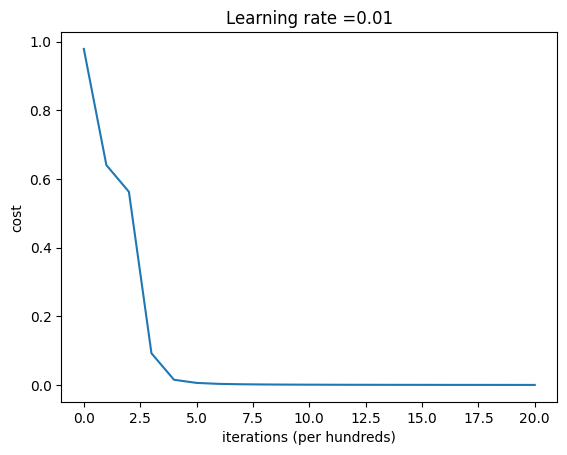

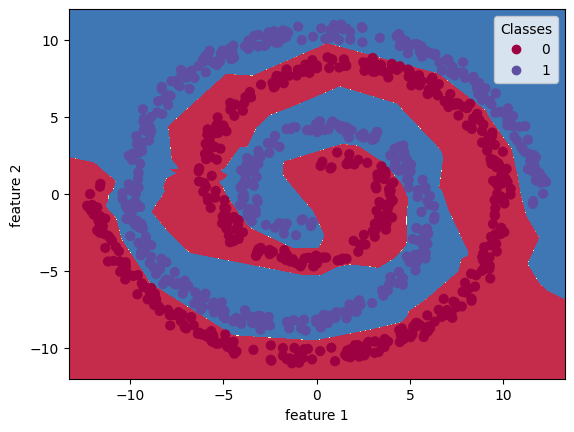

In [5]:
num_epochs=2000; activation_L_1="relu"; activation_L="sigmoid"
learning_rate = 0.01; layers_dims=[X.shape[-1],12,12,12, 1]

forward, costs = L_layer_model(X, Y, layers_dims, learning_rate, num_epochs, activation_L_1, activation_L, print_cost=True)
Y_pred=forward(X)
acc = k.metrics.binary_accuracy(tf.transpose(Y), tf.transpose(Y_pred), threshold=0.5)
print(f"train accuracy: { acc.numpy().item() *100 } %")
plot_costs(costs, learning_rate)
plot_decision_boundary(forward, X_np, Y_np)

### Single Neuron Model Run

Cost in epochs 1, 3.9174787998199463
Cost in epochs 101, 1.109050989151001
Cost in epochs 201, 0.6573323607444763
Cost in epochs 301, 0.6573048233985901
Cost in epochs 401, 0.6573048233985901
Cost in epochs 501, 0.6573048830032349
Cost in epochs 601, 0.6573048233985901
Cost in epochs 701, 0.6573048830032349
Cost in epochs 801, 0.6573048830032349
Cost in epochs 901, 0.6573048830032349
Cost in epochs 1001, 0.6573048233985901
Cost in epochs 1101, 0.6573048233985901
Cost in epochs 1201, 0.6573048233985901
Cost in epochs 1301, 0.6573048233985901
Cost in epochs 1401, 0.6573048233985901
Cost in epochs 1501, 0.6573048233985901
Cost in epochs 1601, 0.6573048233985901
Cost in epochs 1701, 0.6573048233985901
Cost in epochs 1801, 0.6573048233985901
Cost in epochs 1901, 0.6573048233985901
Cost in epochs 2000, 0.6573048233985901
train accuracy: 59.3999981880188 %


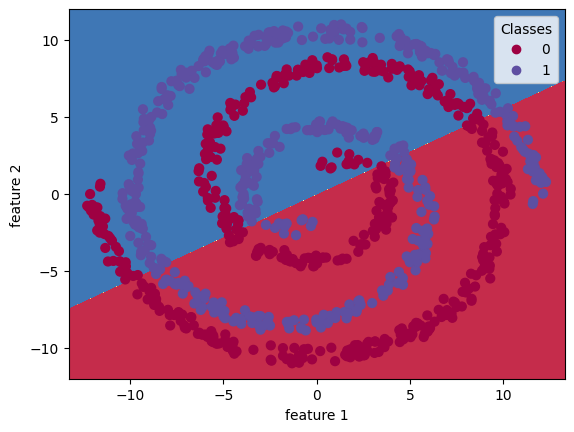

In [6]:
num_epochs=2000; activation_L_1="relu"; activation_L="sigmoid"
learning_rate = 0.01; layers_dims=[X.shape[-1], 1]

forward, costs = L_layer_model(X, Y, layers_dims, learning_rate, num_epochs, activation_L_1, activation_L, print_cost=True)
Y_pred=forward(X)
acc = k.metrics.binary_accuracy(tf.transpose(Y), tf.transpose(Y_pred), threshold=0.5)
print(f"train accuracy: { acc.numpy().item() *100 } %")
plot_decision_boundary(forward, X_np, Y_np)

### 2 Layers (or 1 hidden layer) Neural Network with 1 neuron in output layer

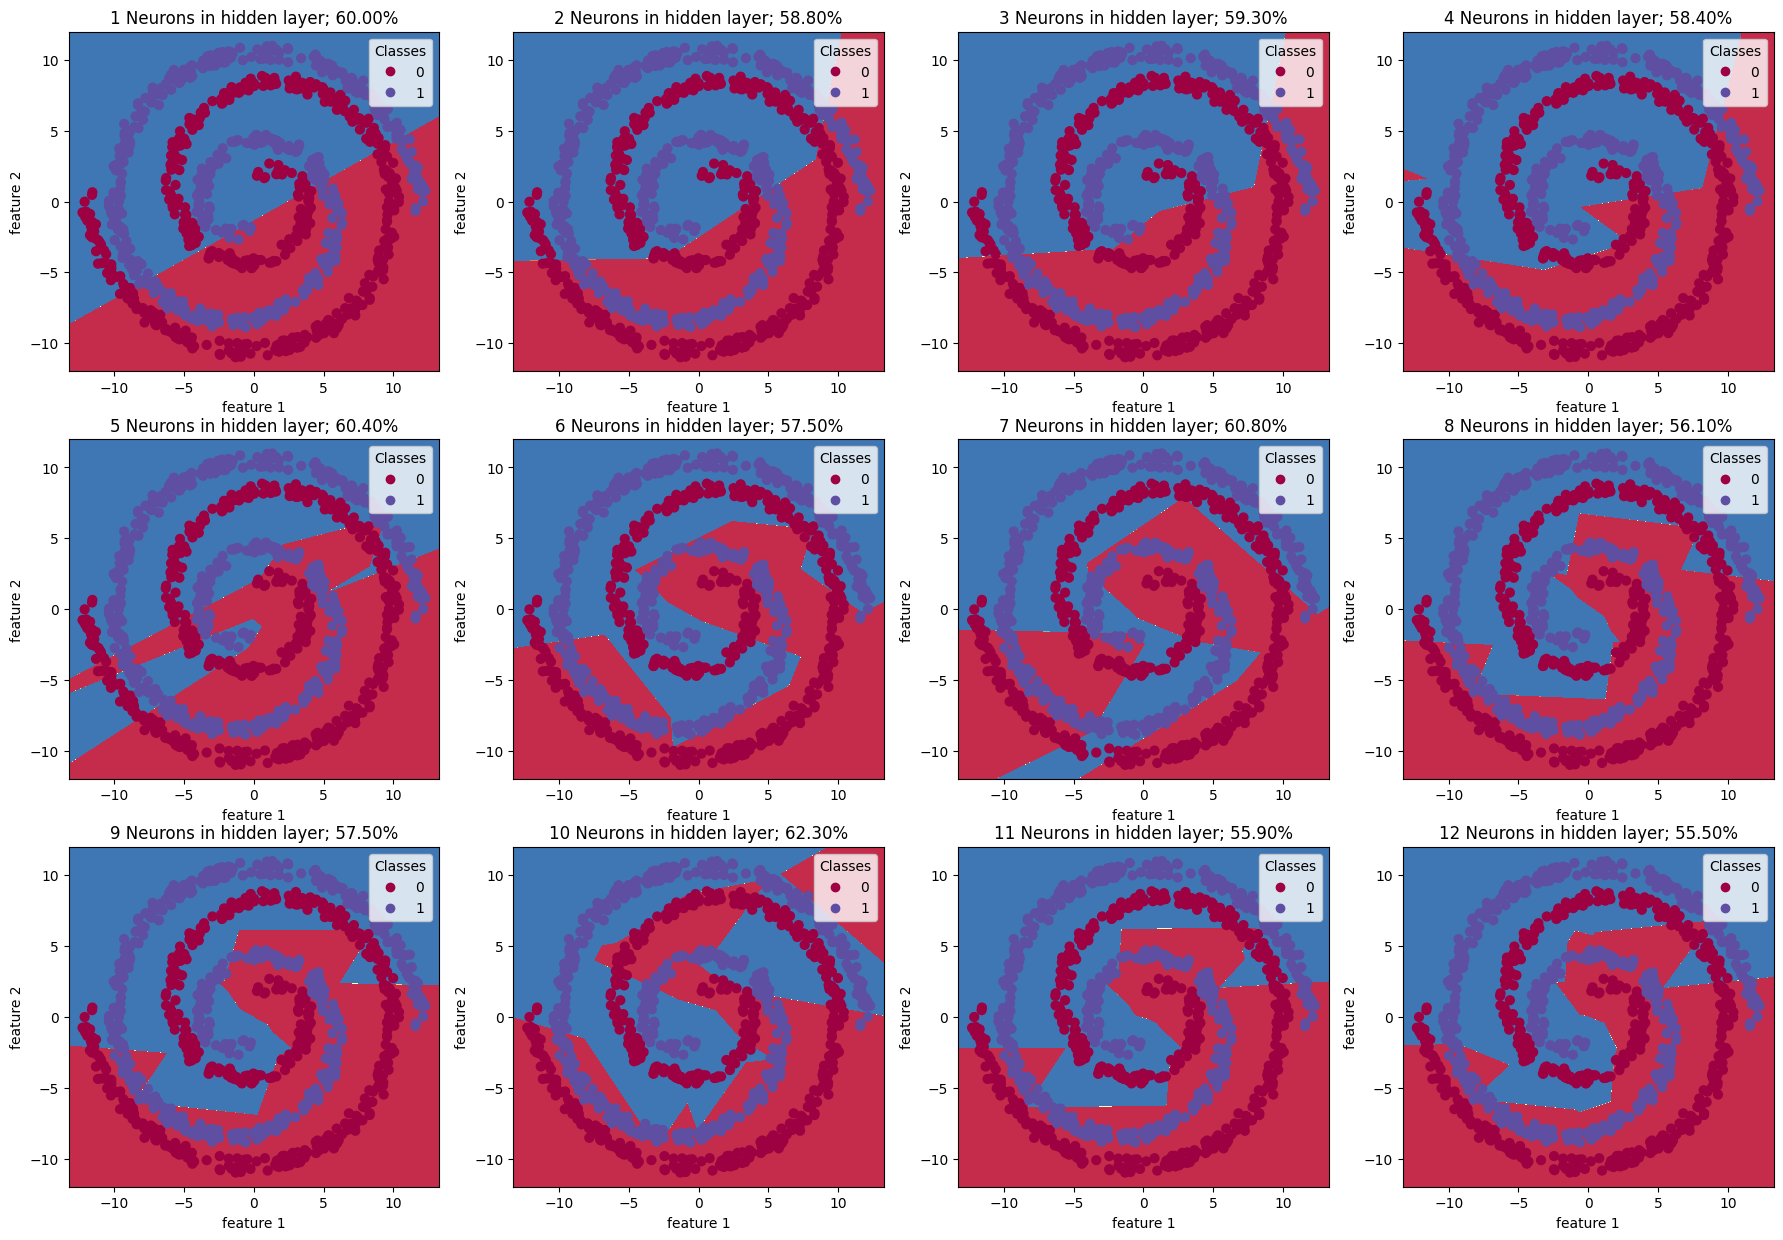

In [7]:
num_epochs=2000; activation_L_1="relu"; activation_L="sigmoid"
learning_rate = 0.01; layers_dims=[X.shape[-1],1, 1]
plt.rcParams['figure.figsize'] = (22.0, 15.0) # width, height
for i in range(1,13):
    layers_dims=[X.shape[-1],i, 1]
    plt.subplot(3, 4, i)
    forward, costs = L_layer_model(X, Y, layers_dims, learning_rate, num_epochs, activation_L_1, activation_L, print_cost=False)
    Y_pred=forward(X)
    acc = k.metrics.binary_accuracy(tf.transpose(Y), tf.transpose(Y_pred), threshold=0.5)
    plot_decision_boundary(forward, X_np, Y_np)
    plt.title(f"{i} Neurons in hidden layer; {acc.numpy().item()*100:.2f}%")


### 3 Layers (or 2 hidden layer) Neural Network with 1 neuron in output layer

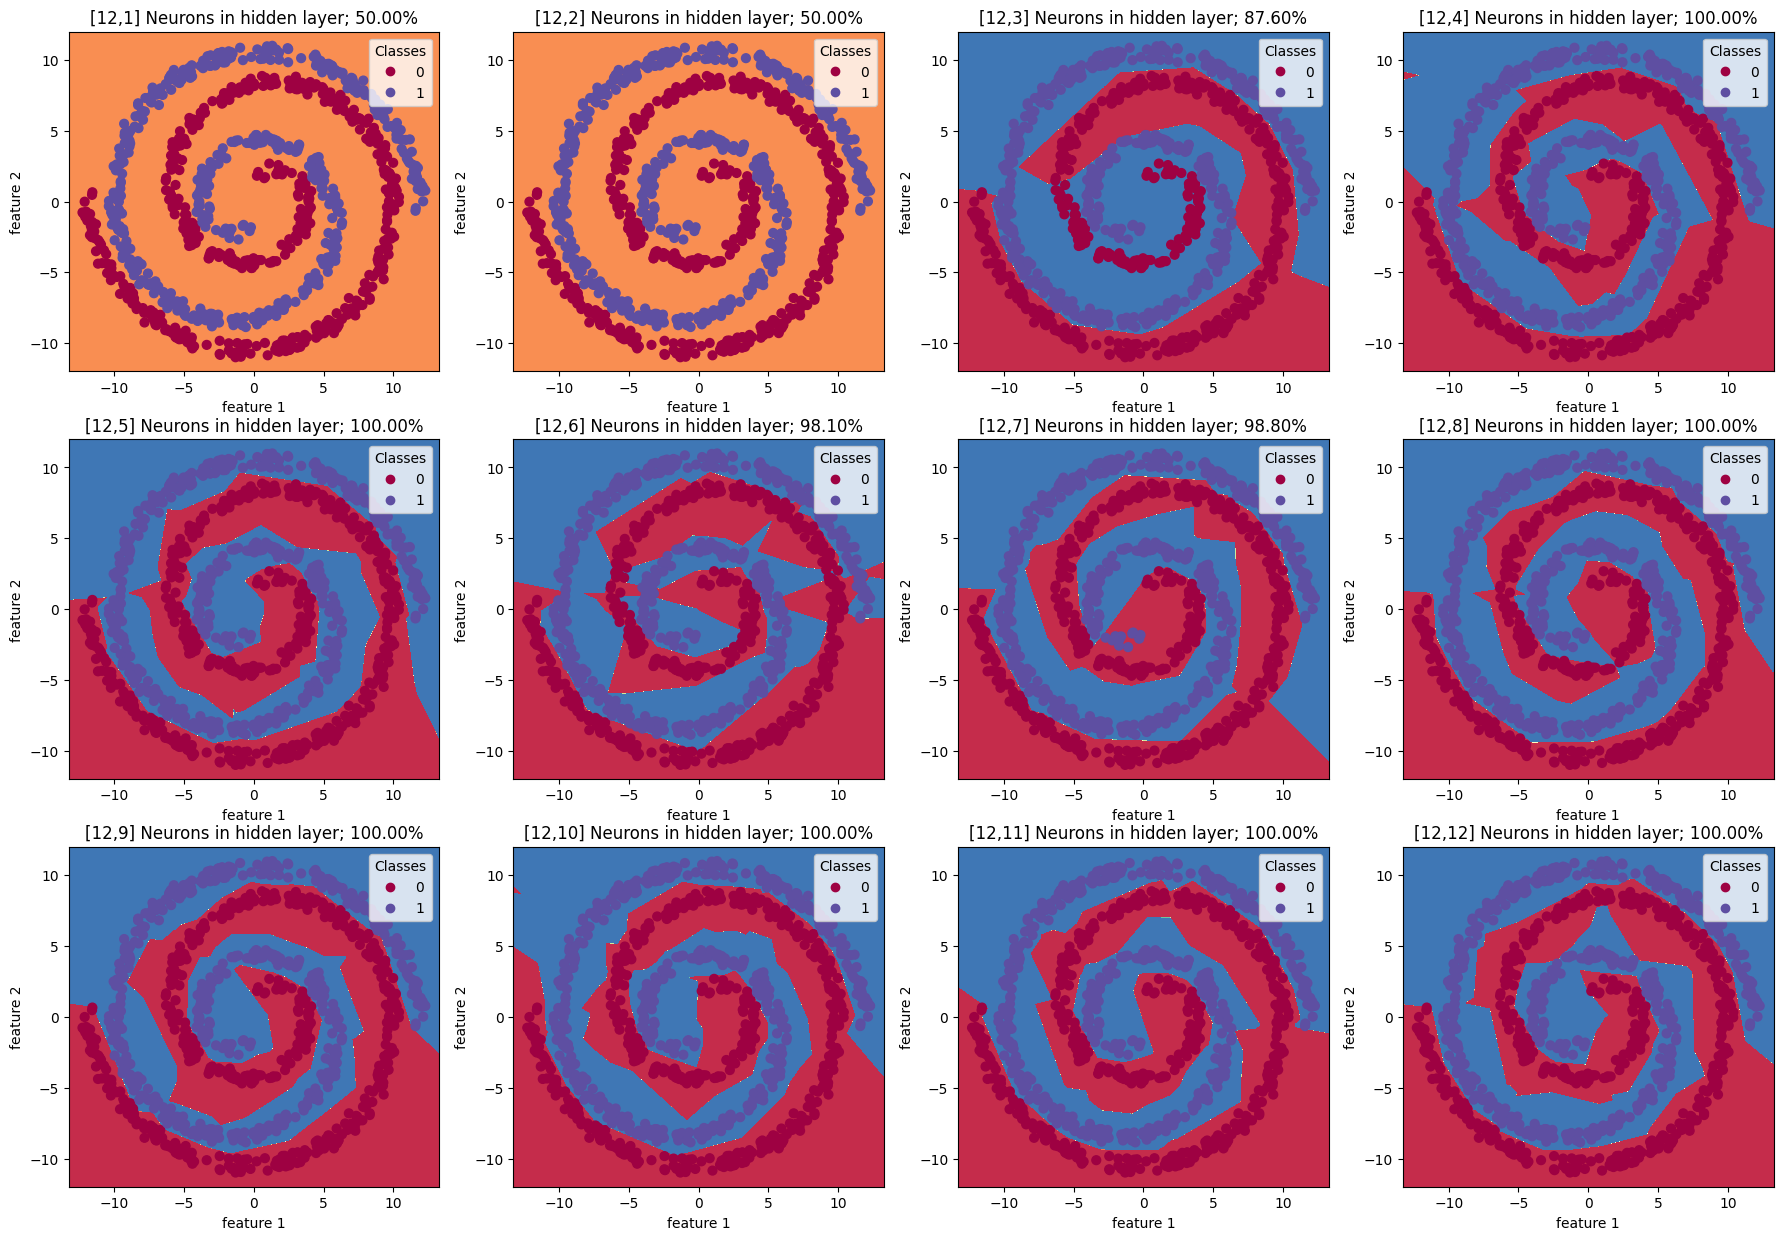

In [8]:
num_epochs=2000; activation_L_1="relu"; activation_L="sigmoid"
learning_rate = 0.01; layers_dims=[X.shape[-1],12,1, 1]
plt.rcParams['figure.figsize'] = (22.0, 15.0) # width, height
for i in range(1,13):
    layers_dims=[X.shape[-1],12, i, 1]
    plt.subplot(3, 4, i)
    forward, costs = L_layer_model(X, Y, layers_dims, learning_rate, num_epochs, activation_L_1, activation_L, print_cost=False)
    Y_pred=forward(X)
    acc = k.metrics.binary_accuracy(tf.transpose(Y), tf.transpose(Y_pred), threshold=0.5)
    plot_decision_boundary(forward, X_np, Y_np)
    plt.title(f"[12,{i}] Neurons in hidden layer; {acc.numpy().item()*100:.2f}%")

### 4 Layers (or 3 hidden layer) Neural Network with 1 neuron in output layer

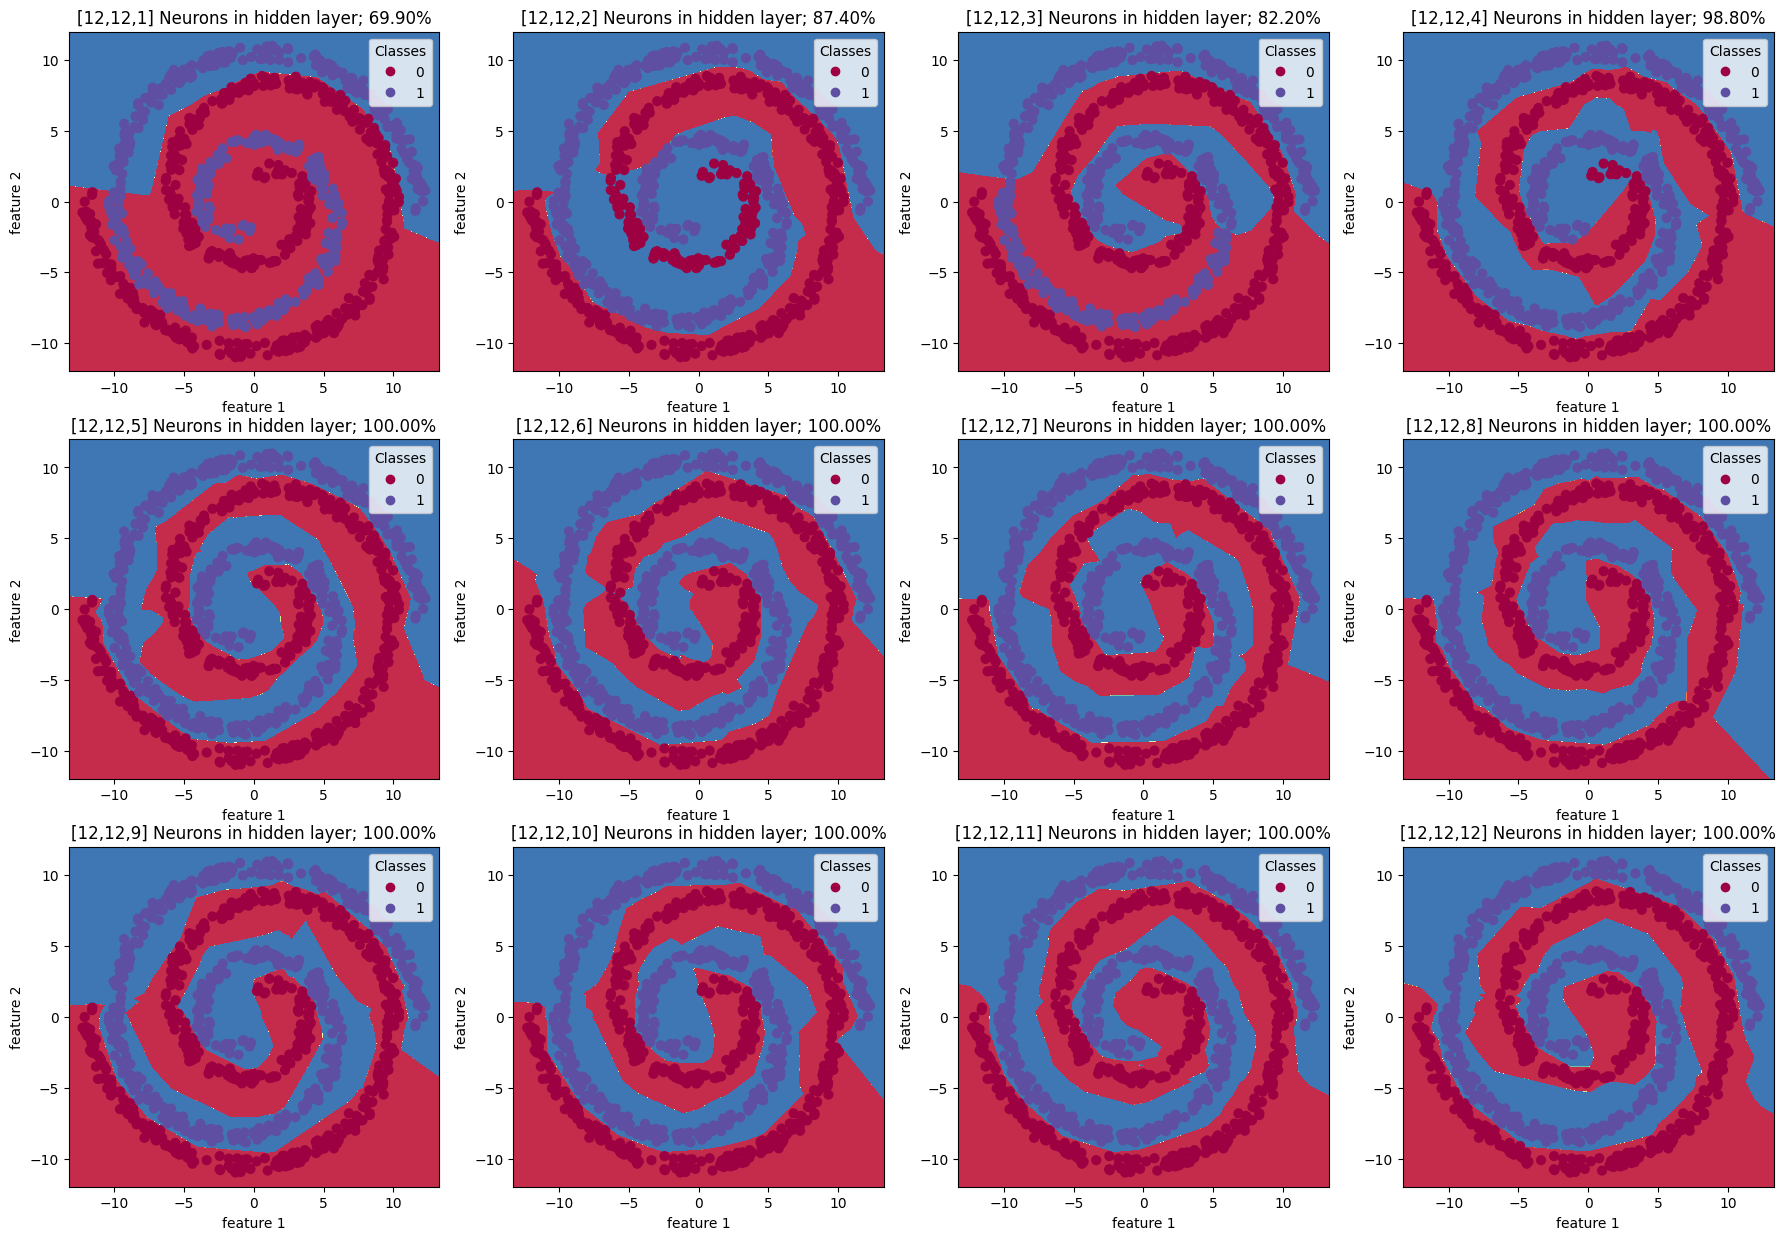

In [9]:
num_epochs=2000; activation_L_1="relu"; activation_L="sigmoid"
learning_rate = 0.01; layers_dims=[X.shape[-1],12,12,1, 1]
plt.rcParams['figure.figsize'] = (22.0, 15.0) # width, height
for i in range(1,13):
    layers_dims=[X.shape[-1],12,12, i, 1]
    plt.subplot(3, 4, i)
    forward, costs = L_layer_model(X, Y, layers_dims, learning_rate, num_epochs, activation_L_1, activation_L, print_cost=False)
    Y_pred=forward(X)
    acc = k.metrics.binary_accuracy(tf.transpose(Y), tf.transpose(Y_pred), threshold=0.5)
    plot_decision_boundary(forward, X_np, Y_np)
    plt.title(f"[12,12,{i}] Neurons in hidden layer; {acc.numpy().item()*100:.2f}%")

### Conclusion

4 layer neural networks in general give best results and adding more layers is increasing accuracy by much but probably overfitting.

Text(0.5, 1.0, '[12,12,12] Neurons in hidden layer; 100.00%')

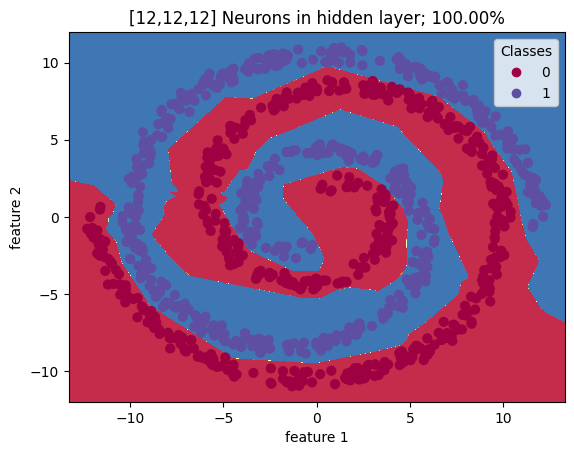

In [10]:
num_epochs=2000; activation_L_1="relu"; activation_L="sigmoid"
learning_rate = 0.01; layers_dims=[X.shape[-1],12,12,12, 1]
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
forward, costs = L_layer_model(X, Y, layers_dims, learning_rate, num_epochs, activation_L_1, activation_L, print_cost=False)
Y_pred=forward(X)
acc = k.metrics.binary_accuracy(tf.transpose(Y), tf.transpose(Y_pred), threshold=0.5)
# print(f"train accuracy: { acc.item() *100 } %")
# plot_costs(costs, learning_rate)
plot_decision_boundary(forward, X_np, Y_np)
plt.title(f"[12,12,12] Neurons in hidden layer; {acc.numpy().item()*100:.2f}%")